# Project Name - Bike Renting

In [20]:
#Load libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from fancyimpute import KNN
sns.set()
%matplotlib inline

In [21]:
#Set the working Directory
os.chdir("E:/Data Science/Data Science/www.edwisor.com/Project/Bike Rent/Edwisor")

In [22]:
#Check the working Directory
os.getcwd()

'E:\\Data Science\\Data Science\\www.edwisor.com\\Project\\Bike Rent\\Edwisor'

# Eploratory Data Analysis

In [23]:
#Load the Data
Dataset = pd.read_csv("day.csv", sep=",")

In [24]:
#Head of the Dataset
Dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
#Shape of the Data
Dataset.shape

(731, 16)

In [26]:
Dataset.drop("dteday", axis=1, inplace=True)

In [27]:
#Data types
Dataset.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [28]:
#Columns
Dataset.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [29]:
#Numerical columns
numerical_columns = Dataset.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['instant',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [30]:
#Categorical columns
categorical_columns = Dataset.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_columns

[]

In [31]:
#Statistical Summary of the dataset
Dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [32]:
#Check Missing values
missing_value = pd.DataFrame(Dataset.isnull().sum())
missing_value

,0
instant,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [33]:
#Missing values in dataset
Dataset.isnull().sum().sum()

0

<Figure size 1440x1440 with 0 Axes>

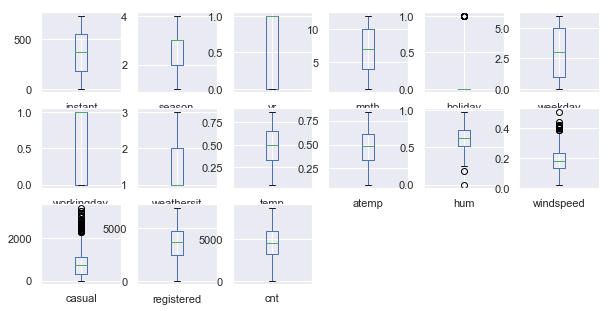

In [34]:
#Outliers
plt.figure(figsize=(20,20))
Dataset.plot(kind="box",subplots=True,layout=(3,6), figsize=(10,5))
plt.show()

In [35]:
#Detect and remove the outliers
for i in numerical_columns:
    print(i)
    q75,q25=np.percentile(Dataset[i],[75,25])
    iqr = q75-q25
    min = q25-(iqr*1.5)
    print(min)
    max = q75+(iqr*1.5)
    print(max)
    Dataset.loc[Dataset[i]<min,i] = np.nan
    Dataset.loc[Dataset[i]>max,i] = np.nan

instant
-364.0
1096.0
season
0.5
4.5
yr
-1.5
2.5
mnth
-5.0
19.0
holiday
0.0
0.0
weekday
-5.0
11.0
workingday
-1.5
2.5
weathersit
-0.5
3.5
temp
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
hum
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125
casual
-855.25
2266.75
registered
-922.25
8195.75
cnt
-1054.0
10162.0


In [36]:
Dataset.isnull().sum().sum()

80

In [37]:
#Dataset = Dataset.fillna(Dataset.mean())
# Imputing missing values with KNN
Dataset = pd.DataFrame(KNN(k = 5).fit_transform(Dataset), columns = Dataset.columns)

Imputing row 1/731 with 0 missing, elapsed time: 0.439
Imputing row 101/731 with 0 missing, elapsed time: 0.441
Imputing row 201/731 with 0 missing, elapsed time: 0.442
Imputing row 301/731 with 0 missing, elapsed time: 0.443
Imputing row 401/731 with 0 missing, elapsed time: 0.444
Imputing row 501/731 with 0 missing, elapsed time: 0.446
Imputing row 601/731 with 0 missing, elapsed time: 0.448
Imputing row 701/731 with 0 missing, elapsed time: 0.449


In [38]:
Dataset.isnull().sum().sum()

0

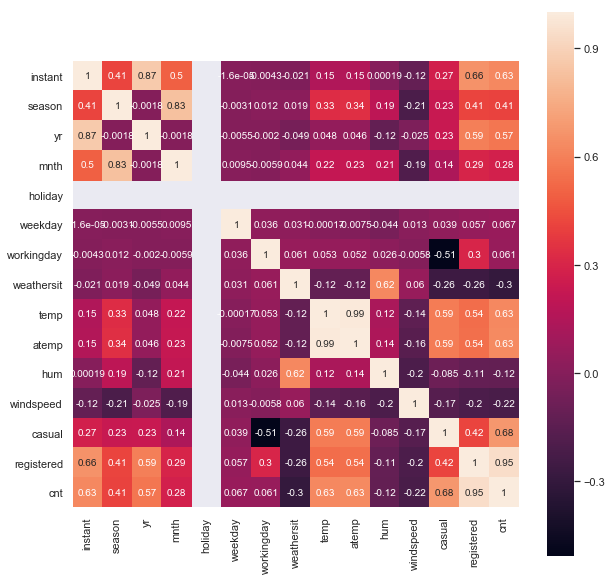

In [39]:
#Feature Selection
corr = Dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True)

In [40]:
target_feature = abs(corr["cnt"])
relevant_feature = target_feature[target_feature<0.75]
relevant_feature

instant       0.628830
season        0.406100
yr            0.566710
mnth          0.279977
weekday       0.067443
workingday    0.061156
weathersit    0.297391
temp          0.627494
atemp         0.631066
hum           0.123999
windspeed     0.217476
casual        0.679178
Name: cnt, dtype: float64

In [41]:
# split data into independent and dependent
X = Dataset[["instant","season","yr","mnth","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual"]]
y = Dataset["cnt"]

In [42]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [43]:
#shape of X_train
X_train.shape

(584, 12)

In [44]:
#Shape of X_test
X_test.shape

(147, 12)

# Feature Scaling

In [46]:
#Scale the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [47]:
#Import Linear Regression Model and instantiate a Linear Regression Object
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()  # Linear_Regration is the object of class Linear Regression
Linear_Regression.fit(X_train,y_train)  # Learning from Data using Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
#Coefficient of Linear Regression
Linear_Regression.coef_

array([-1507.36818558,   434.7100871 ,  2128.32743105,   705.0219119 ,
          82.17082192,   664.16689355,  -234.52733561,   -62.85132287,
         407.14929247,   -70.34487702,   -63.96155652,  1098.67332351])

In [49]:
#Intercept values 
Linear_Regression.intercept_

4595.313356164384

In [50]:
#Apply my learning data and the prediction
prediction1 = Linear_Regression.predict(X_test)
prediction1

array([3849.73295974, 3071.58017839, 3996.00393904, 3942.30198637,
       6990.15845008, 4630.77465841, 5114.03760201, 3600.10458885,
       2108.2540859 , 4822.715509  , 2792.42199017, 1981.57791916,
         14.19218852, 1811.83060135, 7466.47073339, 3075.86755898,
       5285.57160873, 6196.4115924 , 3822.38989365, 4941.81706757,
       2144.12531132, 6958.61746752, 4750.75030148, 2554.80663791,
       4964.06097835, 4068.26801189, 7934.39101765, 4145.03578041,
       2849.0939031 , 2692.6820832 ,  677.59836944, 3314.76902109,
       2167.42727812, 2337.40329519, 8032.1017319 , 4707.9630677 ,
       1610.63404243, 2461.99798066, 6843.54391154, 3633.54883303,
       3594.27818896, 6367.16691307, 6853.76080772, 5264.56529983,
       5316.88867532, 5115.61074031, 6612.32274658, 3927.84898584,
       4041.69810599, 5424.6481249 , 2589.12796438, 6687.85114101,
       3320.12650502, 1485.6549377 , 4551.31659103, 2092.55476103,
       1277.19167513, 6881.48576639, 4890.24421511, 1563.76474

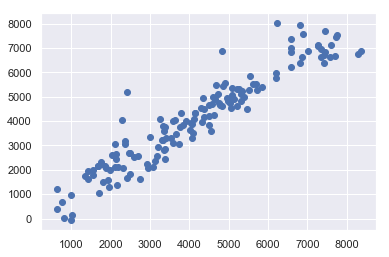

In [51]:
plt.scatter(y_test,prediction1)

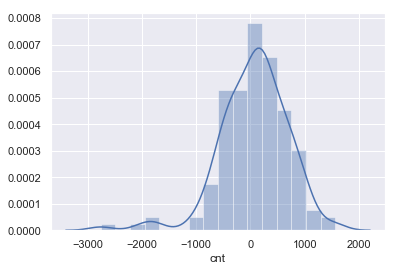

In [52]:
#Plot the Resudual Error
sns.distplot(y_test - prediction1)

In [53]:
#Publish the accuracy metrics
from sklearn import metrics
metrics.mean_absolute_error(y_test, prediction1) #Mean Absolute Error

474.6686123696738

In [54]:
# RMSE = root mean squared error = on an average your prediction is of by 5 units
np.sqrt(metrics.mean_absolute_error(y_test, prediction1))

21.786890837604016

In [55]:
#r2 = % of variations explained by model = overall what amount of base error is model able to reduce
metrics.r2_score(y_test, prediction1)

0.8926895532332262

# Decision Tree

In [56]:
#Decision Tree algorithm
from sklearn import tree
Decision_tree = tree.DecisionTreeRegressor()
Decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [57]:
prediction2 = Decision_tree.predict(X_test)
prediction2

array([3777., 3623., 4258., 4169., 6031., 4727., 5260., 3820., 3727.,
       5633., 4191., 2077.,  959., 4046., 7665., 3422., 5362., 6233.,
       4991., 5115., 1815., 7363., 5020., 3129., 5119., 3663., 7175.,
       4169., 3129., 2115., 2832., 3272., 1471., 1013., 6207., 4539.,
       1450., 3747., 5713., 3663., 4191., 7375., 6207., 5740., 4484.,
       5740., 7865., 3669., 1013., 4991., 2227., 7691., 3750., 1635.,
       4381., 2832., 1589., 7375., 4590., 1606., 2423., 2077., 4844.,
       2162., 4773., 7639., 4629., 5260., 1550., 2808., 7534., 7216.,
       5260., 1321., 7359., 7393., 7582., 4401., 2077., 2423., 5062.,
       3272., 7282., 2132., 5008., 4097., 3267., 4991., 7112., 3974.,
       1098., 4727., 4669., 5119., 1834., 1550.,  986., 6598., 5130.,
       3959., 3392., 1623., 3214., 5992., 6312., 2056., 1817., 1977.,
       2046., 3053., 4451., 5062., 5191., 3750., 4649., 4773., 8173.,
       4991., 4569., 7534., 2252., 4169., 6830., 2252., 2471., 3272.,
       1406., 3292.,

In [58]:
from sklearn import metrics
metrics.r2_score(prediction2,y_test)

0.8878340872820077

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest = RandomForestRegressor(n_estimators=500)
Random_Forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
prediction3 = Random_Forest.predict(X_test)
prediction3

array([3515.242, 3072.374, 4054.414, 3793.218, 6309.868, 4848.612,
       4970.126, 4206.696, 3541.78 , 4360.554, 3952.018, 2071.162,
       1038.014, 3282.032, 7615.234, 2667.388, 5061.028, 6669.778,
       4577.092, 4843.21 , 1758.688, 7271.932, 4909.13 , 3231.178,
       4918.278, 4002.336, 6529.638, 3906.368, 3176.814, 2150.848,
       2415.984, 3314.462, 2222.158, 2521.446, 6378.912, 4563.974,
       1476.638, 2537.848, 6352.774, 3654.572, 4216.016, 6787.15 ,
       5977.764, 6020.426, 5022.182, 5492.696, 7280.272, 3948.014,
       3929.094, 4791.264, 2483.474, 7526.578, 3466.964, 1998.628,
       4219.588, 2659.174, 1786.93 , 7013.382, 4769.516, 1582.744,
       2632.382, 2030.314, 4964.536, 2017.334, 4239.654, 7550.784,
       4563.792, 5193.334, 1683.372, 3449.334, 7102.7  , 6808.288,
       5126.056, 1484.074, 6935.848, 7615.2  , 7582.83 , 4419.6  ,
       2027.39 , 2724.236, 4436.84 , 3214.678, 7045.24 , 2078.032,
       5179.242, 3820.722, 3038.612, 4491.842, 6635.872, 3929.

In [61]:
from sklearn import metrics
metrics.r2_score(prediction3,y_test)

0.9202248847626989